In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 数据预处理

In [306]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['population', 'profit'])
data.head()


,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


<AxesSubplot:xlabel='population', ylabel='profit'>

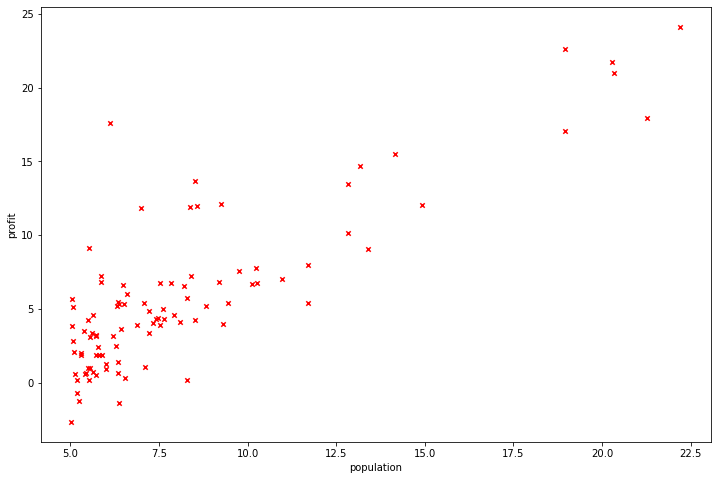

In [307]:
data.plot(kind = 'scatter', x = 'population', y = 'profit', figsize = (12, 8), c='r', marker = 'x')

In [308]:
def costFunction(X, y, theta):
    # inner = np.power((theta.T * X - y), 2) #就算是在code中矩阵乘法顺序也不能交换
    inner = np.power((X * theta.T - y), 2)
    return np.sum(inner) / (len(X) * 2)


In [309]:
data.insert(0, 'Ones', 1)
data

,Ones,population,profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [310]:

iterations = 10000
alpha = 0.01

In [311]:
cols = data.shape[1]
X = data.iloc[:, :cols-1]
y = data.iloc[:, cols-1:]

In [312]:
X.head()

,Ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [313]:
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [314]:
X.shape, y.shape

((97, 2), (97, 1))

In [315]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))
theta

matrix([[0, 0]])

In [316]:
costFunction(X, y, theta)

32.072733877455676

In [317]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = costFunction(X, y, theta)
        
    return theta, cost

In [318]:
g, cost = gradientDescent(X, y, theta, alpha, iterations)
g

matrix([[-3.89578082,  1.19303364]])

In [319]:
costFunction(X, y, g)

4.476971375975179

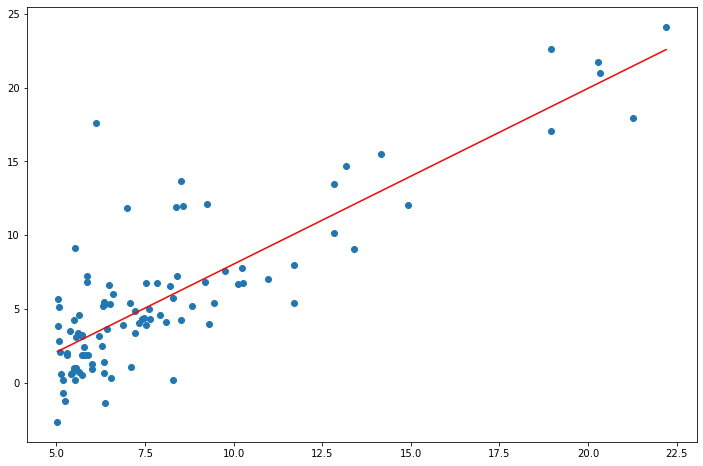

In [320]:
x = np.linspace(data.population.min(), data.population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='prediction')
ax.scatter(data.population, data.profit, label='Training Data')
plt.show()

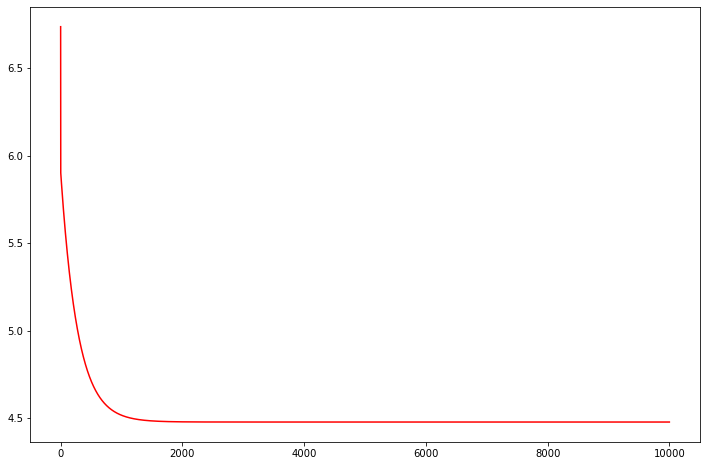

In [321]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iterations), cost, 'r')
plt.show()